###### Content under Creative Commons Attribution license CC-BY 4.0, code under MIT license (c)2015 Franco N. Bellomo, Lucas Bellomo

##Modelo teórico

Con la discretización que realizamos llegamos a:

\begin{equation}
\left.\dfrac{\partial^{2}T}{\partial z^{2}}\right|_{i} \simeq \dfrac{T_{i+1}-2T_{i}+T_{i-1}}{\Delta z^{2}} 
 \end{equation}

Podemos pensar en que las temperaturas son en un tiempo $n+1$. Luego, la ecuación a resolver la podemos reescribir como:

\begin{equation}
\dfrac{T_{i}^{n+1}-T_{i}^{n}}{\Delta t} = \kappa \dfrac{T_{i+1}^{n+1}-2T_{i}^{n+1}+T_{i-1}^{n+1}}{\Delta z^{2}}+ \dfrac{A_{0}e^{-\tfrac{z}{L}}}{\rho C}
\end{equation}

Despejando $T_{i}^{n}$ obtenemos

\begin{equation}
-\lambda T_{i-1}^{n+1}+[1+2\lambda]T_{i}^{n+1}-\lambda T_{i+1}^{n+1}-\Delta tB=T_{i}^{n}
\end{equation}

donde $\lambda=\dfrac{\kappa\Delta t}{\Delta z^{2}}$ y $B = \dfrac{A_{0}e^{-\tfrac{z}{L}}}{C\rho}$. Es decir, me genere un sistema de ecuaciones donde las incognitas son todas las temperaturas en un tiempo $t=n+1$.

Recordar que el tiempo se mueve entre $n = 0, 1, ..., m$ y el espacio $i=0, 1, ..., j$.
Ademas, que las temperaturas $T_0$ y $T_j$ son las condiciones de contorno, constantes en nuestro caso,  $\forall i$. Entonces, no nos importa calcular el valor para estos puntos y podemos dividir nuestro sistema inicial en tres casos.

\begin{cases}
T_{0} & para\: i=0\\
-\lambda T_{i-1}^{n+1}+[1+2\lambda]T_{i}^{n+1}-\lambda T_{i+1}^{n+1}=T_{i}^{n}+\Delta tB & para\: i\neq0,\, j\\
T_{j} & para\: i=j
\end{cases}

Escribiendolo de forma matricial obtenemos:

\begin{equation}
\left|\begin{array}{ccccc}
1+\lambda & -\lambda\\
-\lambda & 1+\lambda & -\lambda\\
 & \ddots & \ddots & \ddots\\
 &  & -\lambda & 1+\lambda & -\lambda\\
 &  &  & -\lambda & 1+\lambda
\end{array}\right|\left|\begin{array}{c}
T_{1}^{n+1}\\
T_{2}^{n+1}\\
\vdots\\
T_{j-2}^{n+1}\\
T_{j-1}^{n+1}
\end{array}\right|=\left|\begin{array}{c}
T_{1}^{n}+\lambda T_{0}+\Delta tB\\
T_{2}^{n}+\Delta tB\\
\vdots\\
T_{j-2}^{n}+\Delta tB\\
T_{j-1}^{n}+\lambda T_{j}+\Delta tB
\end{array}\right|
\end{equation}

$$Ax=b$$

Observar que la matriz, es una matriz [tridiagonal](https://en.wikipedia.org/wiki/Tridiagonal_matrix) y que es la misma para cualquier tiempo. Simplemente, con cada avance del $\Delta t$, tenemos que hacer $b = x$.  
Aprobechando de que la matraiz A es la misma $\forall t$, podemos solucionar de forma más optima nuestro problema si factorizando A en LU.

$$A = LU$$
$$LUx = b$$

##Implementación numérica

A es una matriz cuadrada $nz\times nz$, donde $nz$ es la cantidad de puntos que tengamos en la discritización espacial. Por ej, supongamos que $\Delta z = 10km$ entonces $nz=3500$. Por default, numpy guarda los número como float de 64bits (8byte). ¿Cuanto espacio necesitamos para guardar nuestra matriz? 

$$8 \times 3500 \times 3500 = 98MB$$

Ahora, de los $3500^{2}$ elementos de la matriz, mas del 90% son zero que guardamos y que calculamos cada vez que recorremos la matriz!  
Por eso, vamos a implementar [scipy.sparse.spdiags](http://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.spdiags.html#scipy.sparse.spdiags) que es un módulo de scipy para matrices dispersas.  
Ademas, vamos a calcular una sola vez la factorización LU para poder resolver de forma más eficiente nuetro sistema.

In [1]:
from trasferencia_calor import solve_explicit, pretty_plot

import time

%matplotlib inline

In [2]:
a = time.time()
T_out, prop = solve_explicit(metodo='implicit_scipy')
print(time.time() - a)

16.0034658908844


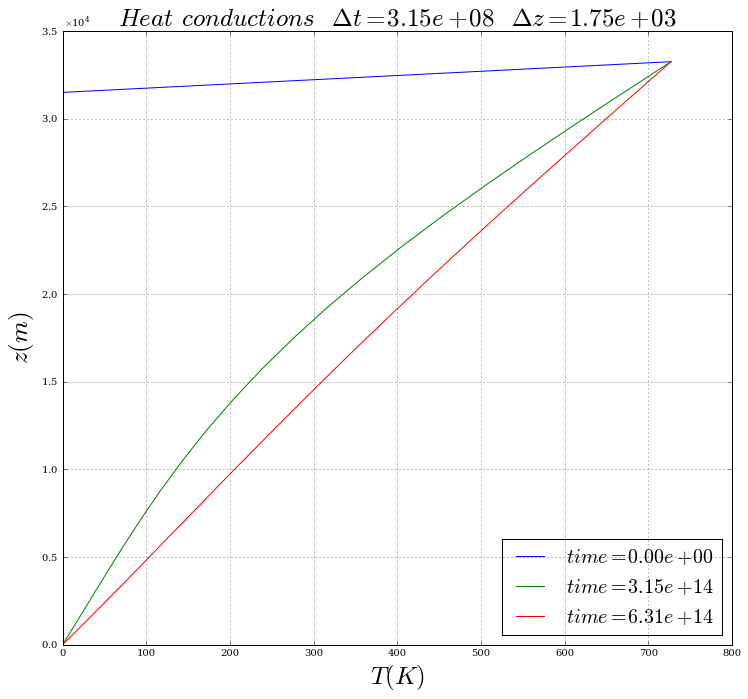

In [3]:
pretty_plot(T_out, prop)

In [1]:
#Este asombroso css es trabajo de @LorenaABarba
from IPython.core.display import HTML
css_file = '../style/css/IPython_personal_style.css'
HTML(open(css_file, "r").read())